In [1]:
from __future__ import division
import pandas as pd, plotly.plotly as py, plotly.tools as tls, plotly.graph_objs as pg,numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

%matplotlib inline
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

In [2]:
#f13 = pd.read_excel('DemoData.xlsx',sheetname='Fall 2013')
f13 = pd.read_excel('Course enrollments - Nate Eastman.xlsx',sheetname='Fall 2013')
df = f13.copy()
df['Credit Hours'].fillna(0,inplace=True)
df['Primary Instructor Last Name'].fillna('Unknown',inplace=True)

In [3]:
grp = df.groupby('Course Title', as_index=False)

In [4]:
#f13 = pd.read_excel('Course enrollments - Nate Eastman.xlsx',sheetname='Fall 2013')
def first(x): 
    return x.min()
agd = grp.aggregate({
        #'Course Title': first,
              'Divs Desc': first,
              'Subj Desc': first,
              'Actual Enrollment': np.sum,
              'Census Enrollment1': np.sum,
              'Primary Instructor Last Name': first,
              'Credit Hours': first,
              'Credit Hours Low': first,
              'Ptrm Desc': first,
              'Delta': np.sum})
df = agd.sort('Delta')
df = df[df['Census Enrollment1'] > 0] # Do this last, so newly added sections get counted

In [5]:
df

,Course Title,Credit Hours Low,Delta,Credit Hours,Census Enrollment1,Actual Enrollment,Divs Desc,Ptrm Desc,Subj Desc,Primary Instructor Last Name
159,Intermediate Spanish,4,-8,4,33,25,Humanities Division,Semester,Spanish,Chopite
52,Calculus A,5,-8,0,49,41,Natural Science Division,Semester,Mathematics,Beier
237,Principles of Chemistry,0,-7,4,114,107,Natural Science Division,Semester,Chemistry,Deibel
141,General Physics I,4,-6,4,37,31,Natural Science Division,Semester,Physics & Astronomy,Zilic
54,Care and Feeding of Your iPod,3,-5,3,66,61,Arts Division,Semester,Music Courses,Culverhouse
55,Cell Physiology L and L,0,-5,4,51,46,Natural Science Division,Semester,Biology,Mulnix
65,Computational Science,3,-5,0,19,14,Natural Science Division,Semester,Computer Science,Lerner
245,Race and Ethnicity in the U.S.,4,-5,0,11,6,Social Science Division,Semester,History,Hunter
81,Differential Equations,3,-5,3,14,9,Natural Science Division,Semester,Mathematics,Pardhanani
77,Culture and Conflict,4,-4,0,36,32,Social Science Division,Semester,Sociology/Anthropology,Rosenberg


(0, 300)

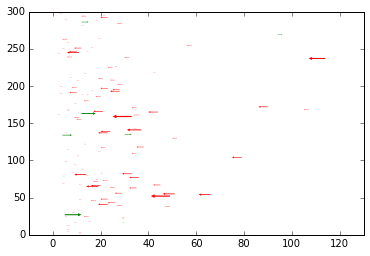

In [23]:
plt.clf()
ax = plt.gca()
for (i,row) in df.iterrows():
    delta = row['Delta']
    if delta > 0: 
        fc = 'green'
    else:
        fc = 'red'
    p = patches.Arrow(row['Census Enrollment1'], #x
                      i, #y
                      delta, #dx
                      0, #dy
                      width=delta,
                      facecolor=fc,
                      linewidth=0,
                      )
    ax.add_patch(p)
ax.set_xlim((-10,130))
ax.set_ylim((0,300))

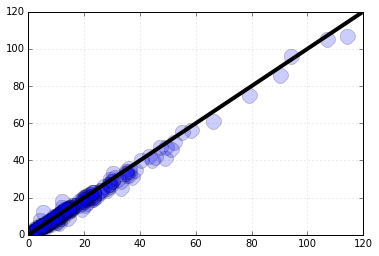

In [29]:
labels = []
N = len(df)
for i in range(N):
    #print i,df.iloc[i].T['Course Title'],df.iloc[i].T['Census Enrollment1']
    label = """<table border="1" class="dataframe">
  <thead><tr><th>Row {i}</th></tr></thead>
  <tbody>
    <tr><th>Course Title</th>
      <td>{ct}</td>
    </tr>
    <tr><th>Census Enrollment1</th>
      <td>{ce1}</td>
    </tr>
    <tr><th>Actual Enrollment</th>
      <td>{ae}</td>
    </tr>
    <tr><th>Delta</th>
      <td>{delta}</td>
    </tr></tbody></table>
    """.format(i=i,
               ct=str(df.iloc[i].T['Course Title']),
               #piln = str(grouped_advertised.iloc[i].T['Primary Instructor Last Name']),
               #dd = str(grouped_advertised.iloc[i].T['Divs Desc']),
               #sd = str(grouped_advertised.iloc[i].T['Subj Desc']),
               ce1 = str(df.iloc[i].T['Census Enrollment1']),
               ae = str(df.iloc[i].T['Actual Enrollment']),
               delta = str(df.iloc[i].T['Actual Enrollment'] - df.iloc[i].T['Census Enrollment1']),
               #piln = str(grouped_advertised.iloc[1].T['Primary Instructor Last Name']),
               
              )
    labels.append(label)
    
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)
points = ax.plot(df['Census Enrollment1'] + np.random.rand(N)*.2, # add some scatter so we can zoom in.
                 df['Actual Enrollment'] + np.random.rand(N)*.2, 
                 'o', 
                 color='b',
                 mec='k', ms=15, mew=1, alpha=.2)
css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""
tooltip = plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10, css=css)
plugins.connect(fig, tooltip)
line = ax.plot(range(120),range(120),'k-',linewidth=4,zorder=10)

(0, 120)

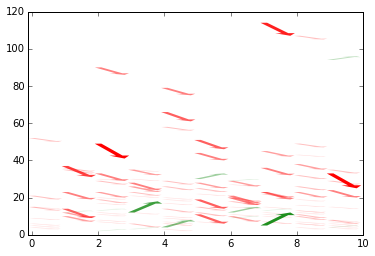

In [14]:
plt.clf()
ax = plt.gca()
for (i,row) in df.iterrows():
    delta = row['Actual Enrollment']-row['Census Enrollment1']
    if delta > 0: 
        fc = 'green'
    else:
        fc = 'red'
    p = patches.Arrow(
        i%10, #x
        row['Census Enrollment1'], #y
        .8, #dx
        delta, #dy
        #width=delta,
        facecolor=fc,
        linewidth=0,
        alpha=abs(delta/8.0),
        )
    ax.add_patch(p)
ax.set_xlim((-0.1,10))
ax.set_ylim((0,120))
# Not quite sure how to label this yet.

(0, 120)

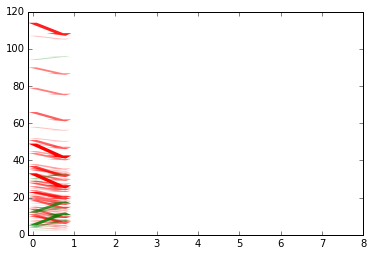

In [22]:
plt.clf()
ax = plt.gca()
for (i,row) in df.iterrows():
    #delta = row['Actual Enrollment']-row['Census Enrollment1']
    delta = row['Delta']
    if delta > 0: 
        fc = 'green'
    else:
        fc = 'red'
    p = patches.Arrow(
        0,#%10, #x
        row['Census Enrollment1'], #y
        0.8, #dx
        delta, #dy
        #width=delta,
        facecolor=fc,
        linewidth=0,
        alpha=abs(delta/8.0),
        )
    ax.add_patch(p)
ax.set_xlim((-0.1,8.0))
ax.set_ylim((0,120))
# Not quite sure how to label this yet.